# **`Supervised Learning - Classification with k-NN and Decision Trees`**

In [7]:
from google.colab import files
uploaded = files.upload()


Saving gender_submission.csv to gender_submission (1).csv
Saving test.csv to test (1).csv
Saving train.csv to train (1).csv


   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  


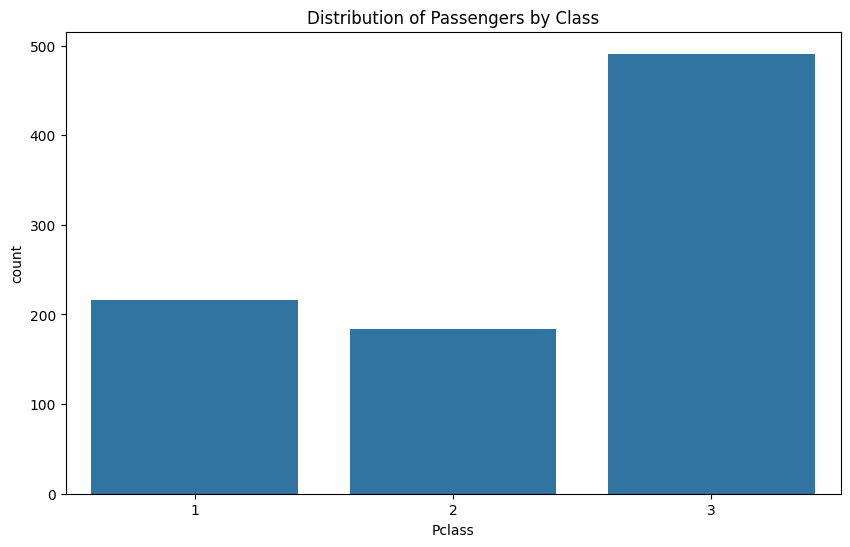

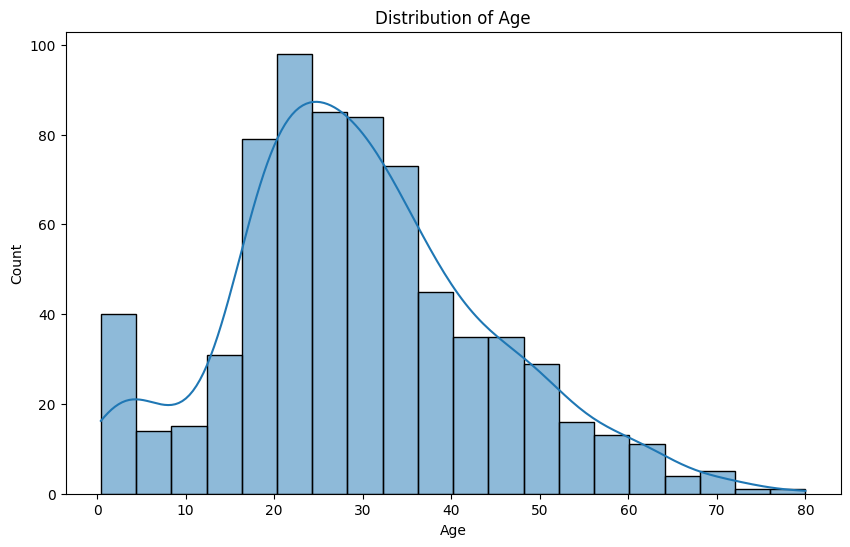

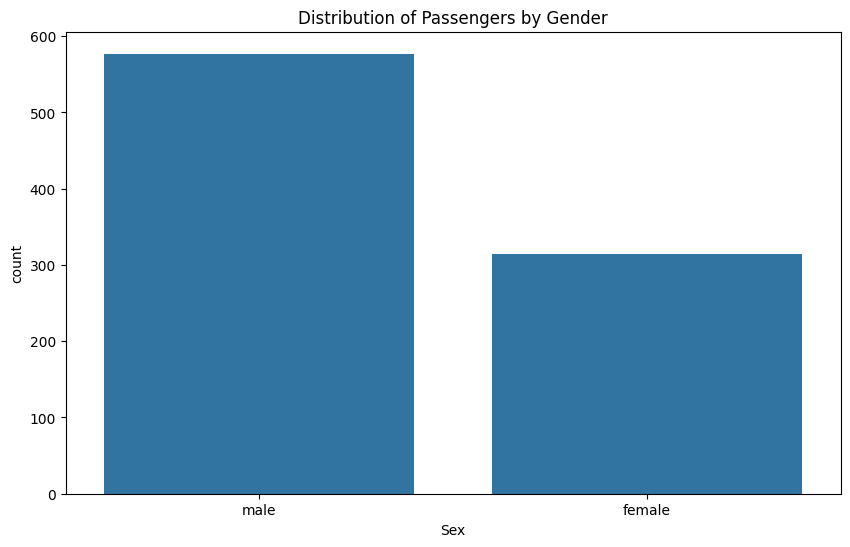

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64
k-NN Accuracy: 0.7940074906367042, Precision: 0.7272727272727273, Recall: 0.72, F1-score: 0.7236180904522613
Decision Tree Accuracy: 0.7565543071161048, Precision: 0.6635514018691588, Recall: 0.71, F1-score: 0.6859903381642513


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


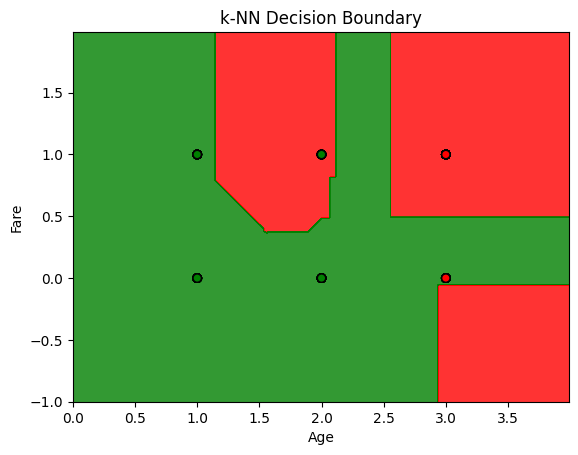

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


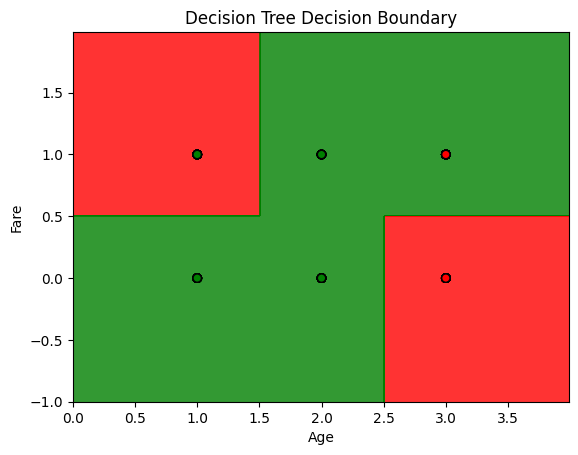

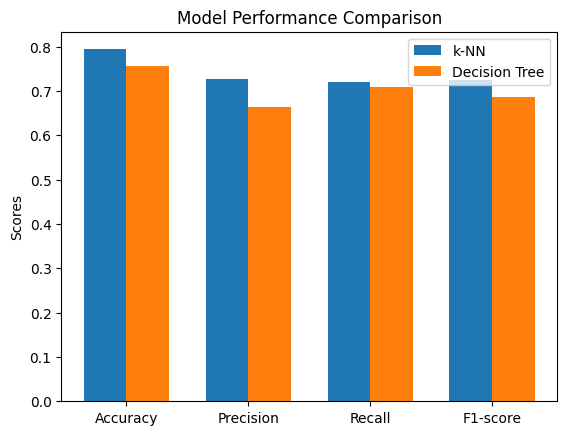

In [10]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from matplotlib.colors import ListedColormap

# Load the Titanic dataset
titanic_data = pd.read_csv('train.csv')

# Display the first few rows
print(titanic_data.head())

# Data Exploration: Visualize the distribution of key features
plt.figure(figsize=(10, 6))
sns.countplot(x='Pclass', data=titanic_data)
plt.title('Distribution of Passengers by Class')
plt.show()

plt.figure(figsize=(10, 6))
sns.histplot(titanic_data['Age'].dropna(), kde=True)
plt.title('Distribution of Age')
plt.show()

plt.figure(figsize=(10, 6))
sns.countplot(x='Sex', data=titanic_data)
plt.title('Distribution of Passengers by Gender')
plt.show()

# Check for missing values
print(titanic_data.isnull().sum())

# Data Preprocessing
# Handle missing values in 'Age' by filling with the median
imputer = SimpleImputer(strategy='median')
titanic_data['Age'] = imputer.fit_transform(titanic_data[['Age']])

# Drop rows with missing 'Embarked'
titanic_data.dropna(subset=['Embarked'], inplace=True)

# Convert 'Sex' and 'Embarked' to numerical values using LabelEncoder
label_encoder_sex = LabelEncoder()
label_encoder_embarked = LabelEncoder()

titanic_data['Sex'] = label_encoder_sex.fit_transform(titanic_data['Sex'])
titanic_data['Embarked'] = label_encoder_embarked.fit_transform(titanic_data['Embarked'])

# Standardize numerical features (Age, Fare)
scaler = StandardScaler()
titanic_data[['Age', 'Fare']] = scaler.fit_transform(titanic_data[['Age', 'Fare']])

# Drop irrelevant columns
titanic_data = titanic_data.drop(columns=['Name', 'Ticket', 'Cabin', 'PassengerId'])

# Split dataset into features (X) and target (y)
X = titanic_data.drop('Survived', axis=1)
y = titanic_data['Survived']

# Split into training and testing sets (70% training, 30% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train k-NN model
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

# Train Decision Tree model
decision_tree = DecisionTreeClassifier(random_state=42)
decision_tree.fit(X_train, y_train)

# Make predictions
y_pred_knn = knn.predict(X_test)
y_pred_tree = decision_tree.predict(X_test)

# Evaluate k-NN
accuracy_knn = accuracy_score(y_test, y_pred_knn)
precision_knn = precision_score(y_test, y_pred_knn)
recall_knn = recall_score(y_test, y_pred_knn)
f1_knn = f1_score(y_test, y_pred_knn)

# Evaluate Decision Tree
accuracy_tree = accuracy_score(y_test, y_pred_tree)
precision_tree = precision_score(y_test, y_pred_tree)
recall_tree = recall_score(y_test, y_pred_tree)
f1_tree = f1_score(y_test, y_pred_tree)

# Print evaluation results
print(f"k-NN Accuracy: {accuracy_knn}, Precision: {precision_knn}, Recall: {recall_knn}, F1-score: {f1_knn}")
print(f"Decision Tree Accuracy: {accuracy_tree}, Precision: {precision_tree}, Recall: {recall_tree}, F1-score: {f1_tree}")

# Plot decision boundaries for both models using 'Age' and 'Fare'
def plot_decision_boundary(model, X, y, title):
    X = X.values # Convert DataFrame to NumPy array
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                         np.arange(y_min, y_max, 0.01))

    # Create a new dataset with the same number of features as the training data
    X_plot = np.column_stack((xx.ravel(), yy.ravel(), np.zeros_like(xx.ravel()), np.zeros_like(xx.ravel()), np.zeros_like(xx.ravel()), np.zeros_like(xx.ravel()), np.zeros_like(xx.ravel())))

    Z = model.predict(X_plot)
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, alpha=0.8, cmap=ListedColormap(('red', 'green')))
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', marker='o', cmap=ListedColormap(('red', 'green')))
    plt.xlabel('Age')
    plt.ylabel('Fare')
    plt.title(title)
    plt.show()

# Plot decision boundaries
plot_decision_boundary(knn, X_test, y_test, 'k-NN Decision Boundary')
plot_decision_boundary(decision_tree, X_test, y_test, 'Decision Tree Decision Boundary')

# Bar chart comparison of model performance
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-score']
knn_metrics = [accuracy_knn, precision_knn, recall_knn, f1_knn]
tree_metrics = [accuracy_tree, precision_tree, recall_tree, f1_tree]

x = np.arange(len(metrics))  # Label locations
width = 0.35  # Width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, knn_metrics, width, label='k-NN')
rects2 = ax.bar(x + width/2, tree_metrics, width, label='Decision Tree')

# Add labels, title, and custom x-axis tick labels
ax.set_ylabel('Scores')
ax.set_title('Model Performance Comparison')
ax.set_xticks(x)
ax.set_xticklabels(metrics)
ax.legend()

plt.show()




*   **Data Exploration and Visualization:** Shows data distributions of key
     features (Pclass, Age, Sex) and checks for missing values.

*  **Data Preprocessing**: Handles missing values, encodes categorical
     variables, and standardizes numerical features.

*  ** Model Training:** Implements both k-NN and Decision Tree classifiers.

*   **Model Evaluation:** Evaluates both models using accuracy, precision, recall, and F1-score.


*   **Visualization:** Plots decision boundaries for both models using Age and Fare and compares the performance of k-NN and Decision Tree models with a bar chart.






